# **Практичне завдання з дисципліни**
# **Нейронні мережі**
# **ВАРІАНТ № **
***
## *Завдання :*
## *Розробити Jupyter Notebook для вирішення завдання класифікації*
## *на основі наборів даних*
* #1 - https://keras.io/api/datasets/cifar10/
* #2 - https://drive.google.com/drive/folders/15MdqvRMl8YPFCbemyiLdUcX5SL4A5mx2?usp=sharing
***
## **Виконав студент 4 курсу**
## **Групи АнД-41**
## **Айрапетов Давид**

In [4]:
!pip install --upgrade tensorflow-hub

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LeakyReLU,GlobalMaxPooling2D
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1. Завантаження та попередній аналіз даних. 

In [ ]:
PATH_DATA = 'exam2021NN-2'

In [6]:
IMAGE_SIZE = (224, 224)

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_path = os.path.join(PATH_DATA, 'Test')
val_path = os.path.join(PATH_DATA, 'Vali')

In [19]:
train_data = train_datagen.flow_from_directory(train_path,
                                                                   target_size=IMAGE_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='categorical')

val_data = val_datagen.flow_from_directory(val_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
target_len = 2

In [37]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

#### CNN 

In [23]:
tf.random.set_seed(42)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(target_len,
                          activation='softmax')
])

In [25]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=val_data,
                            validation_steps=len(val_data))

Epoch 1/5
63/63 [==============================] - 59s 941ms/step - loss: 0.4568 - accuracy: 0.7915 - val_loss: 0.4197 - val_accuracy: 0.7870
Epoch 2/5
63/63 [==============================] - 55s 869ms/step - loss: 0.3355 - accuracy: 0.8655 - val_loss: 0.6255 - val_accuracy: 0.7165
Epoch 3/5
63/63 [==============================] - 54s 869ms/step - loss: 0.2887 - accuracy: 0.8865 - val_loss: 0.3702 - val_accuracy: 0.8285
Epoch 4/5
63/63 [==============================] - 53s 848ms/step - loss: 0.2881 - accuracy: 0.8870 - val_loss: 0.3967 - val_accuracy: 0.8565
Epoch 5/5
63/63 [==============================] - 54s 859ms/step - loss: 0.2280 - accuracy: 0.9130 - val_loss: 0.5591 - val_accuracy: 0.7855


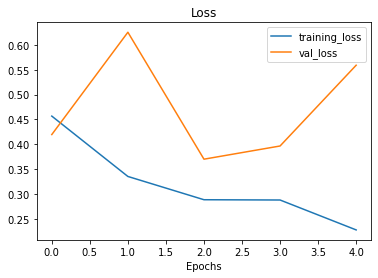

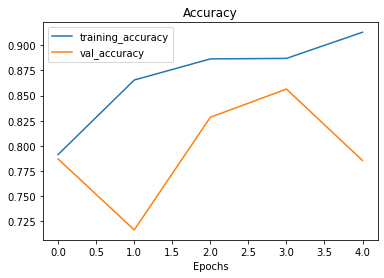

In [38]:
plot_loss_curves(cnn_history)

#### EfficientNet (optimizer Adam)

In [28]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [29]:
def create_model(model_url, num_classes=None, input_shape=None):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [30]:
efficientnet_model = create_model(efficientnet_url, num_classes=target_len, input_shape=IMAGE_SIZE+(3,))

In [32]:
# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=2,
                                              steps_per_epoch=len(train_data),
                                              validation_data=val_data,
                                              validation_steps=len(val_data))

Epoch 1/2
63/63 [==============================] - 74s 1s/step - loss: 0.0624 - accuracy: 0.9865 - val_loss: 0.0563 - val_accuracy: 0.9845
Epoch 2/2
63/63 [==============================] - 71s 1s/step - loss: 0.0366 - accuracy: 0.9930 - val_loss: 0.0474 - val_accuracy: 0.9850


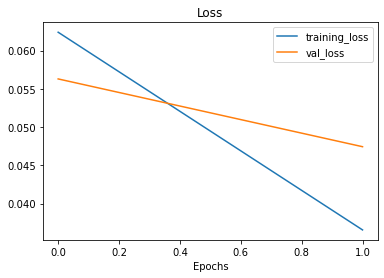

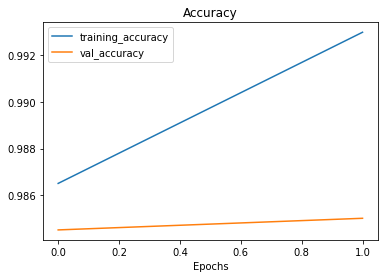

In [39]:
plot_loss_curves(efficientnet_history)